Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


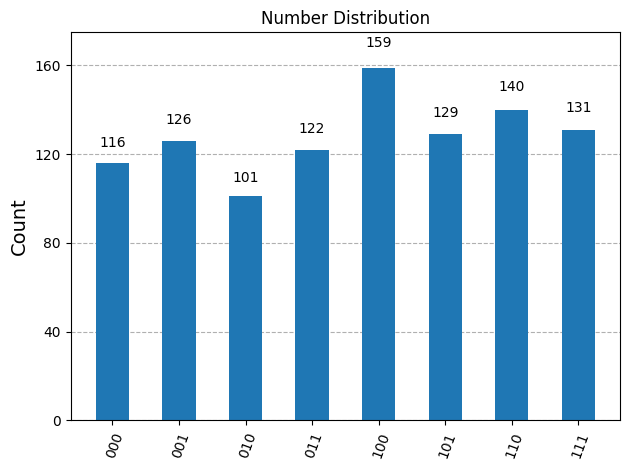

In [1]:
# Random number generator
# Given some n, this program will output a random number between 0 and 2^(n-1). 

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from numpy import arccos, sqrt
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector

n = 3

# Create a new circuit with two qubits
qc = QuantumCircuit(n)
 
# Add a Hadamard gate to qubit 0
for i in range(n):
    qc.h(i)

# now that a Hadamard gate has been applied to each qubit, every possibility has an equal chance of occurring. 
# Get the statevector
# each qubit has two states, entangling n qubits will result in 2^n possibilities
state1 = Statevector.from_instruction(qc)
print(state1)

# Add Measurements
meas_qc = qc.copy()
meas_qc.measure_all()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(meas_qc).result()
counts = result.get_counts(meas_qc)
plot_histogram(counts, title='Number Distribution')